<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Selective_Search_for_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Selective Search for Object Recognition**

논문 링크: http://huppelen.nl/publications/selectiveSearchDraft.pdf

기존의 **sliding window** 방식(Exhaustive Search)은 이미지에서 가능한 모든 위치를 검색해야할 뿐만아니라 다른 규모로 검색을 해야한다. 즉, 계산 비용이 매우 많이들기 때문에 비효율적이다. 이런 단점을 보완하기 위해 나온 것이 바로 **Region Proposal Algorithms**인데 이번엔 그 중에서 **selective search**를 알아보겠다.

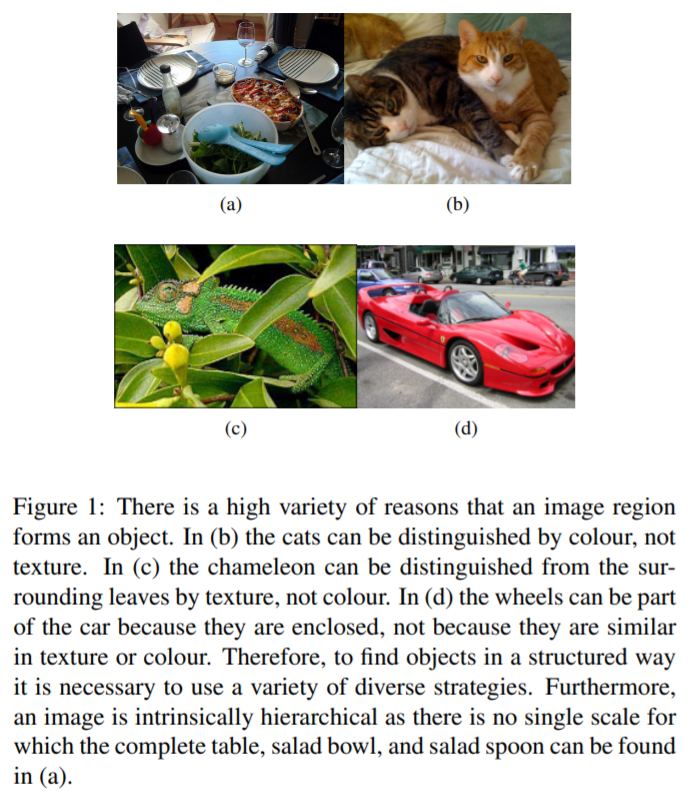

위의 그림 Figure 1에서 (a)를 보면 테이블 위에 그릇이 있고, 또 그릇 안에는 숟가락이 올려져있다. 이런 상황에서 테이블 위에 올려져 있는 모든 것을 테이블로 인식할 수 있다. 또는 테이블 위의 그릇, 숟가락 등을 따로 분리해 인식할 수도 있다.

이렇게 보다 싶이 이미지는 주어진 상황에 대해 종속적이다. (a)의 경우는 테이블 위에 있는 다른 오브젝트들이 테이블에 종속적이라고 할 수 있다.

따라서 segmentation을 진행할 때 multiple scale에서 관찰을 해야한다. 이번엔 (b)를 보겠다. (b)의 경우에는 두 고양이이는 texture은 같지만 색깔에 따라 구별할 수 있다. 하지만, (c)를 보면 풀과 카멜레온을 색만으로는 구별할 수 없다. 그러나 이 경우는 texture로 구별할 수 있다. (d)의 경우에는 바퀴의 휠과 차량 전체가 색깔이 다르며 소재도 다르다. 그러나 자동차의 부속품으로 속해있기 때문에 자동차라는 물체로 인식이 된다.

이처럼 (a) ~ (d)를 보면 알 수 있듯이 **물체를 구분할 때, 색이나 소재 등 어느 한가지로만 판단해서는 안된다. 즉, 주위 물건과의 배치, 상황에 대한 인식 등 여러가지가 필요**하다.

## **Selective Search**

그래서 본 논문은 selective search라는 아이디어를 제안했다.

selective search에 대해 좀 더 자세히 설명을 하자면, Bottom-up segmentation을 통해 이미지의 구조를 활용하여 object의 위치를 생성하고 exhaustive search를 통해 모든 가능한 object 위치를 capture한다. 그 후 여러가지 invariance property들을 활용해 Bottom up segmentation애서 grouping하는 기준을 다양화한다.

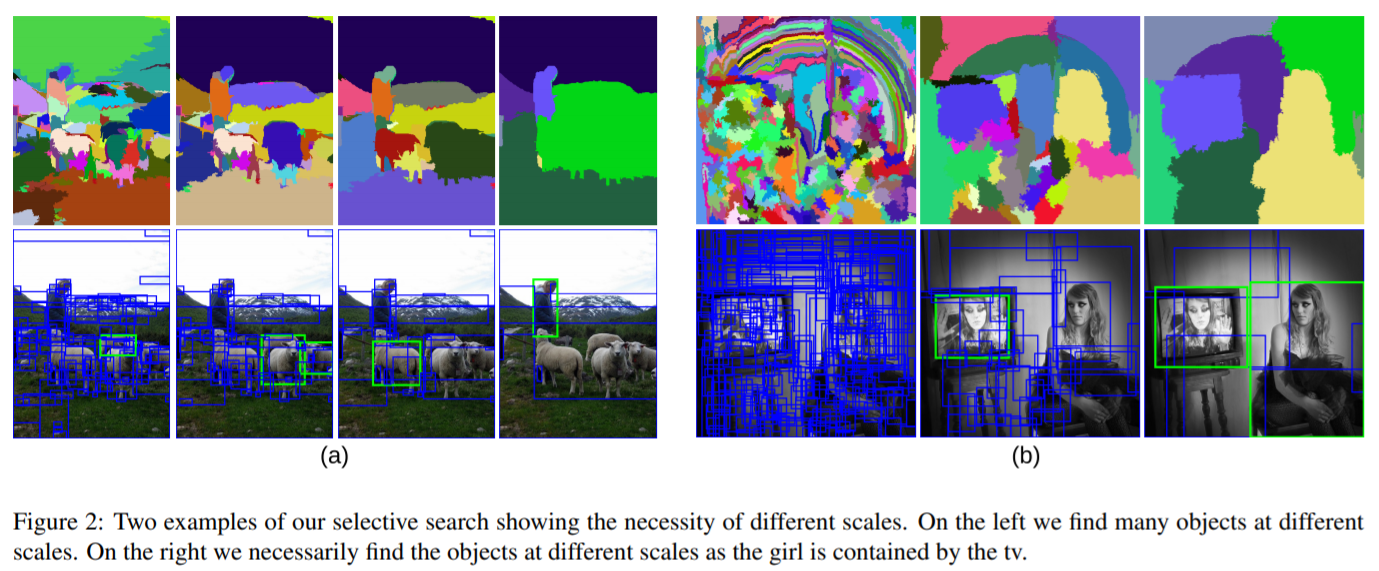

위의 그림 Figure 2는 selective search를 (a), (b)로 두 개의 예시를 들어 보여준다. 다른 scale의 여러 object들을 찾아내는 것을 확인할 수 있다.

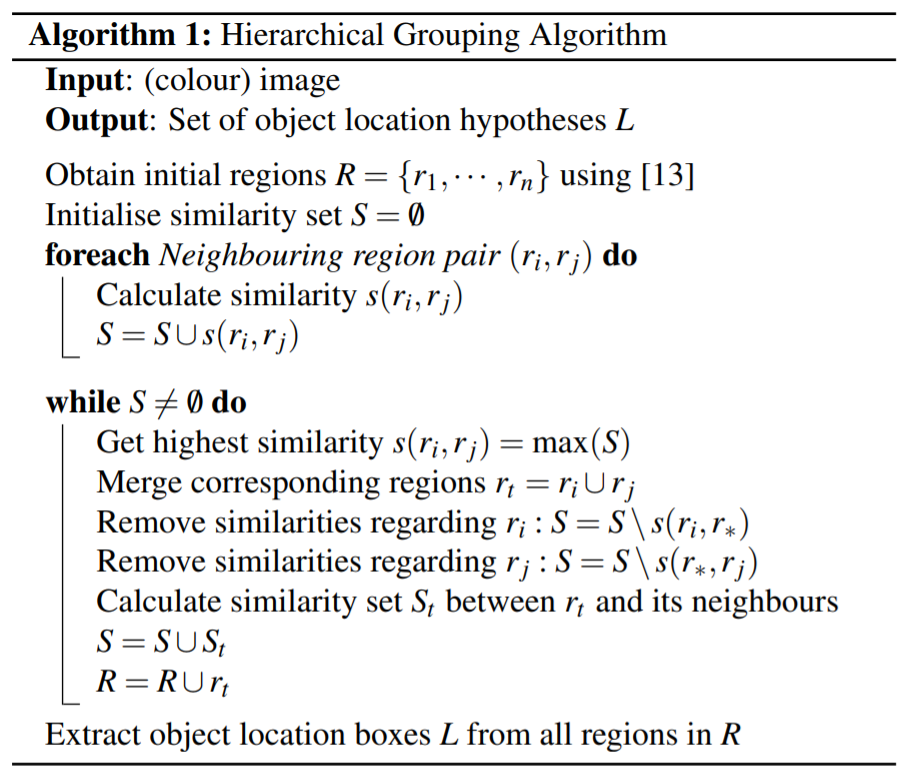

위의 Algorithm 1을 보겠다. **Selective Search**는 **hierachical algorithm**으로 물체의 서로 다른 크기와 모호한 경계를 해결한다.
1. "Efficient GraphBased Image Segmentation" 방법을 이용하여 초기 영역들을 지정한다.
2. 네모 박스(boundary box)로 구분된 영역과 다른 네모 박스 영역과의 유사도를 계산한다.
3. Greedy 알고리즘을 이용해 유사도가 높은 영역끼리 합쳐짐을 반복한다. 서로 엉킨것들이 single region이 될때까지 반복한다.
4. r(s)와 r(i) 영역이 합쳐진 새로운 영역을 r(t)라 할 때, r(t)의 특징은 모든 픽셀에 다시 접근하여 계산하지 않고 r(s)와 r(i)의 특징값으로부터 계산된다. 이를 통해 계산 시간의 양을 줄인다.

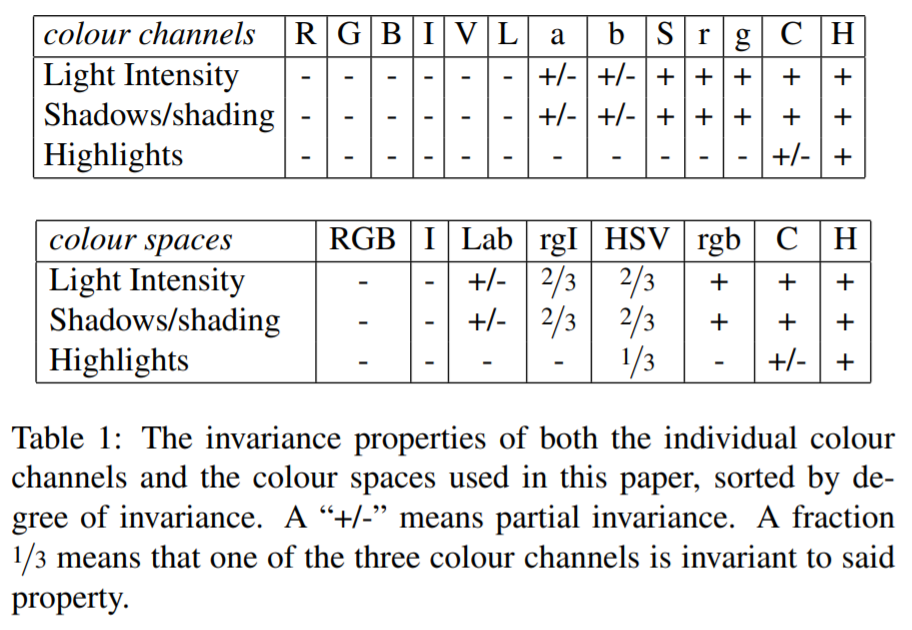

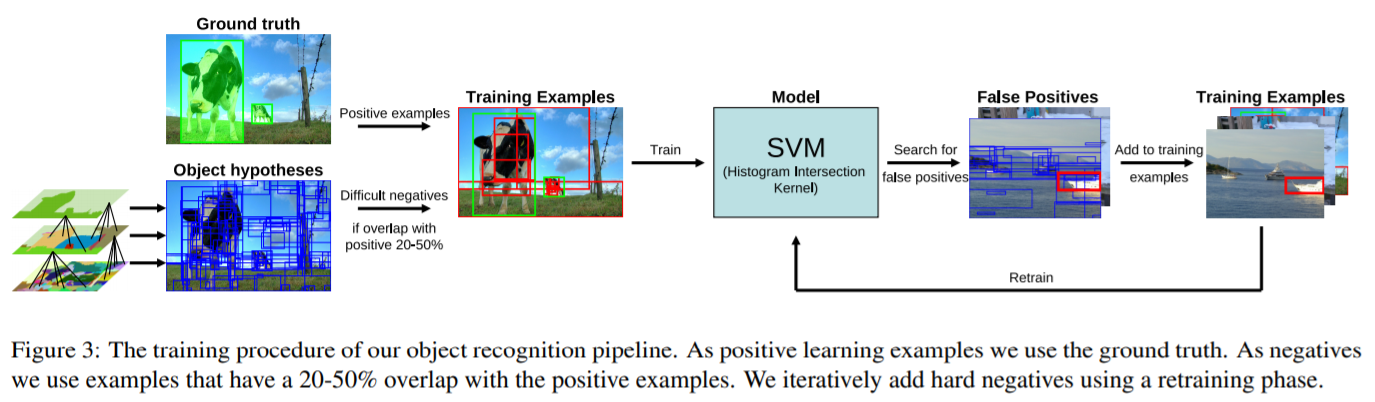

위의 그림 Figure 3에서 먼저 (train->) 부분을 기준으로 왼쪽을 먼저 보겠다.

정답 데이터인 **Ground truth**를 준비한다. Selective Search를 거쳐나온 물체가 존재하는 후보 영역중에서 ground table과 overlap 되는 부분이 20% ~ 50%가 되는 것을 **negative example**로 지정한다. 지정한 negative example 영역에서 SIFT(Scale Invariant Feature Transform)로 추출한 이미지의 기술자, 키포인트 영역을 BOW와 4-level의 spatial pyramid로 히스토그램을 만든다. 그리고 이것을 SVM에 train시킨다.

그 다음 (train->) 오른쪽을 보겠다. 가운데 False Positives 그림을 보면 해당 그림에서 빨간색 네모 영역안에 있는 배의 이미지의 경우는 잘려있기 때문에 완전한 배의 형상이라 보기 어렵다. 따라서 이를 데이터상 정답이라 가정하고 **false positive**라 부른다. 이 false positive에 대해 위 초기 학습과 동일한 방법으로 SVM을 학습시킨다. 이 과정을 논문에선 **add hard negative examples**라고 한다.

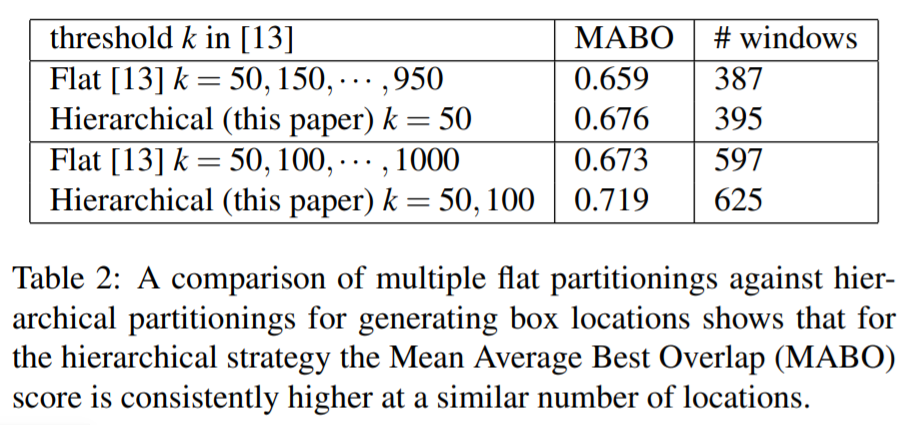

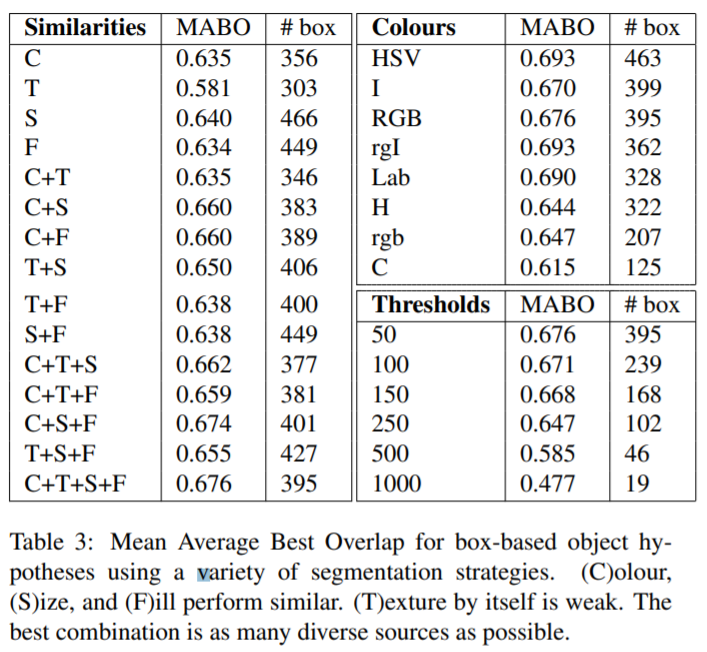

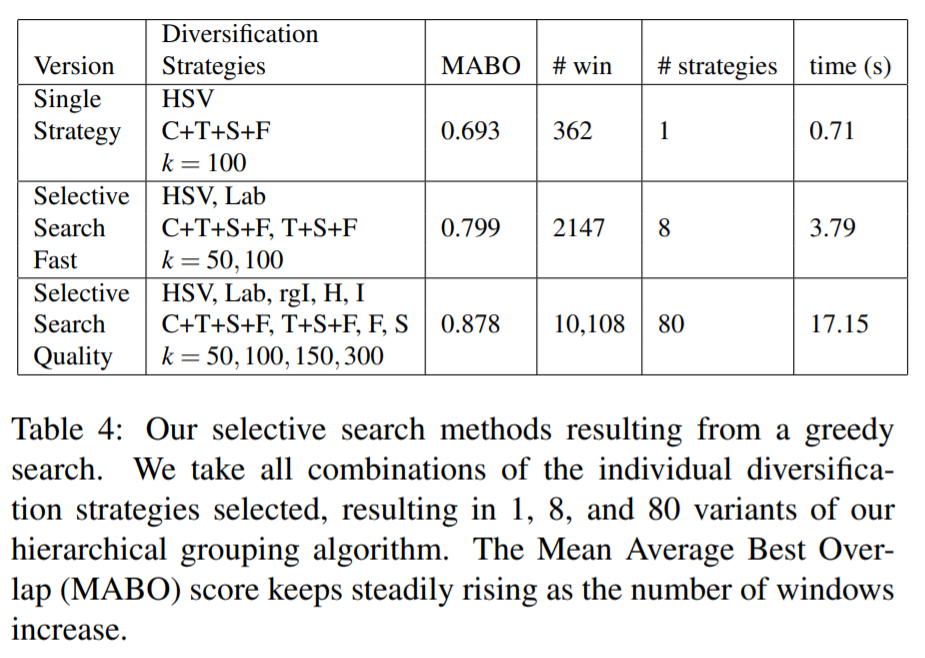

위의 테이블 Table 2~4를 보면 알 수 있다싶이 selective search가 좋은 성능을 내는 것을 알 수 있다. 그리고 특히 단일 strategy 보다 더 좋은 성능을 보이고 있다. 또한 더 많은 기준들을 가지고 grouping을 하는  Quality 중심의 SS는 더욱 좋은 성능을 보이고 있다. 

## **Code**

코드를 보는 것이 더 이해하기 쉬울 수 있으므로 코드를 따로 올리겠다.

먼저 아래 코드는 selective search algorithm을 구현한 코드이다.

In [ ]:
import sys
import cv2

if __name__ == '__main__':
    # If image path and f/q is not passed as command
    # line arguments, quit and display help message
    if len(sys.argv) < 3:
        print(__doc__)
        sys.exit(1)

    # speed-up using multithreads
    cv2.setUseOptimized(True);
    cv2.setNumThreads(4);

    # read image
    im = cv2.imread(sys.argv[1])
    # resize image
    newHeight = 200
    newWidth = int(im.shape[1]*200/im.shape[0])
    im = cv2.resize(im, (newWidth, newHeight))    

    # create Selective Search Segmentation Object using default parameters
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    # set input image on which we will run segmentation
    ss.setBaseImage(im)

    # Switch to fast but low recall Selective Search method
    if (sys.argv[2] == 'f'):
        ss.switchToSelectiveSearchFast()

    # Switch to high recall but slow Selective Search method
    elif (sys.argv[2] == 'q'):
        ss.switchToSelectiveSearchQuality()
    # if argument is neither f nor q print help message
    else:
        print(__doc__)
        sys.exit(1)

    # run selective search segmentation on input image
    rects = ss.process()
    print('Total Number of Region Proposals: {}'.format(len(rects)))
    
    # number of region proposals to show
    numShowRects = 100
    # increment to increase/decrease total number
    # of reason proposals to be shown
    increment = 50

    while True:
        # create a copy of original image
        imOut = im.copy()

        # itereate over all the region proposals
        for i, rect in enumerate(rects):
            # draw rectangle for region proposal till numShowRects
            if (i < numShowRects):
                x, y, w, h = rect
                cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
            else:
                break

        # show output
        cv2.imshow("Output", imOut)

        # record key press
        k = cv2.waitKey(0) & 0xFF

        # m is pressed
        if k == 109:
            # increase total number of rectangles to show by increment
            numShowRects += increment
        # l is pressed
        elif k == 108 and numShowRects > increment:
            # decrease total number of rectangles to show by increment
            numShowRects -= increment
        # q is pressed
        elif k == 113:
            break
    # close image show window
    cv2.destroyAllWindows()

### **Example**

selectivesearch download

In [1]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=f2a8018ba73dd43d712f2371d2646fe58502b963777a2a545159f5019261c26e
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


Load Image

img shape: (2880, 5120, 3)


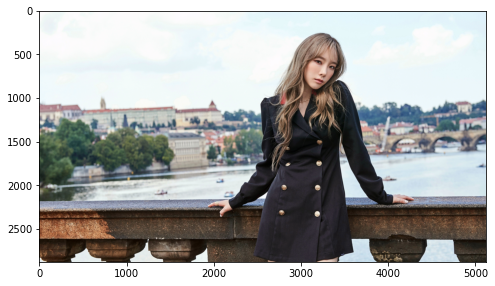

In [3]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# load Taeyeon image 
img = cv2.imread('king_taeyeon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [4]:
# selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=20000)
# scale은 비교적 크게할지 작게 할지 정함
# min_size는 최소 넓이

print(type(regions), len(regions))

<class 'list'> 131


**반환된 Region Proposal(후보 영역)에 대한 정보**
- Type은 List이다, 세부 원소로 dict를 가지고 있다.
- rect 키값은 순서대로 **x 시작 좌표, y 시작 좌표, 너비, 높이** 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box이다.
- **size는 Bounding box의 크기**이다.
- **labels는 해당 rect로 지정된 Bounding Box내에 있는 object의 고유 ID**이다.
- 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커진다.

In [6]:
# 너무 길어서 주석 처리를 했다.
# print(regions)

In [7]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
# 너무 길어서 주석 처리를 했다.
# print(cand_rects)

[(0, 0, 5119, 1196), (296, 320, 422, 184), (2920, 320, 604, 1035), (2995, 325, 440, 579), (2715, 762, 317, 508), (3279, 861, 632, 1089), (2539, 893, 227, 609), (1532, 976, 210, 153), (2795, 997, 445, 523), (1081, 1000, 439, 125), (456, 1014, 754, 404), (0, 1025, 610, 142), (1057, 1028, 1380, 398), (4393, 1028, 726, 369), (1557, 1035, 522, 157), (2723, 1036, 225, 471), (3644, 1037, 1159, 392), (1731, 1128, 825, 279), (0, 1140, 538, 186), (954, 1141, 622, 216), (2639, 1168, 1162, 1711), (0, 1185, 1538, 854), (3674, 1217, 364, 448), (4822, 1233, 297, 139), (1245, 1268, 839, 599), (4102, 1283, 791, 361), (4823, 1292, 296, 317), (1994, 1338, 588, 449), (3778, 1339, 596, 325), (1819, 1363, 408, 270), (3439, 1414, 334, 730), (2391, 1415, 426, 582), (3783, 1513, 1336, 259), (3815, 1636, 1304, 621), (2709, 1713, 443, 429), (723, 1717, 1782, 228), (2118, 1817, 692, 1062), (1045, 1819, 1443, 124), (587, 1833, 1902, 345), (331, 1891, 685, 97), (3619, 1892, 507, 366), (1624, 1900, 1081, 463), (74, 

**bounding box 시각화**

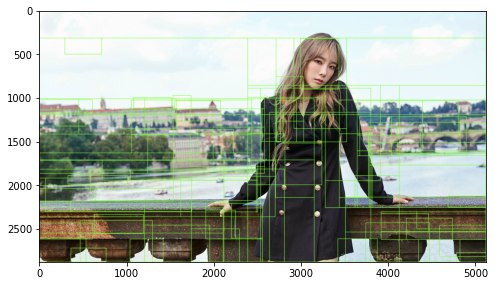

In [9]:
# bounding box 시각화는 보통 opencv의 rectangle()을 이용한다.
# cv2.rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려준다. 

# bounding box의 크기를 설정하려면 아래와 주석된 코드와 같이 size를 설정할 수 있다
# cand_rects = [cand['rect'] for cand in regions if cand['size'] > 100000]

# bounding box의 색 설정
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    left = rect[0]
    top = rect[1]
    # rect[2]은 weight, rect[3]은 hight이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더한다. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=4)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

**다른 색으로 bounding box 시각화**

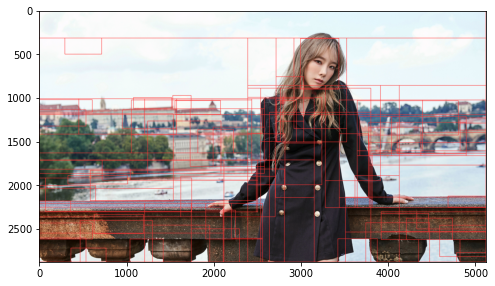

In [11]:
red_rgb = (255, 51, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=red_rgb, thickness=4)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()